In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/hcleroy/PostDoc/Simulation/Aging_Condensates/System_backend/')
import System_backend as backend

## Simulate the system over time with reset-crosslinkers

In [23]:
BindingEnergy = -100
ell_tot = 50
#distance_anchor = 1000.
rho0 = 4*10**-4
teq = 1000
t_compute = 1000
reset_linker_time = 1000 # number of time per simulation the crosslinkers are reset
filename = 'res.npy'
seed = 989875
S = backend.System(ell_tot,rho0,BindingEnergy,seed=seed)

In [24]:
S.get_links_linear_position()

array([50.])

In [27]:
position = list()
tmax = 2000000
Nloop = np.zeros(reset_linker_time,dtype= int)
for step in range(tmax):
    if step%(tmax//reset_linker_time)==0:
          #print(step)
        Nloop[step//reset_linker_time] = S.get_N_loop()
        S.reset_crosslinkers()
    S.evolve()
    position.append(S.get_links_linear_position())

IndexError: index 1000 is out of bounds for axis 0 with size 1000

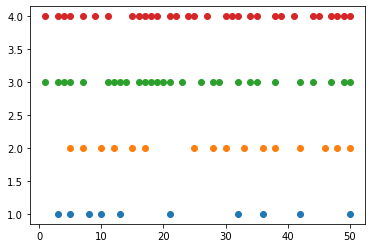

In [26]:
plt.scatter(position[1000],[1 for _ in range(position[1000].__len__())])
plt.scatter(position[10000],[2 for _ in range(position[10000].__len__())])
plt.scatter(position[100000],[3 for _ in range(position[100000].__len__())])
plt.scatter(position[-1],[4 for _ in range(position[-1].__len__())])

In [ ]:
plt.plot(np.arange(0,tmax,tmax//Nloop)